In [1]:
%run moudle/pre_process
%run moudle/segment

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

from datetime import date
import datetime
import time






import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )
src_data=open("data/applications.json")
corpus=src_data.read().replace('}{', '}|{').split('|')



application_list=[]


for item in corpus[:-1]:
    
    vec=application_vec(item)
    if vec:
        application_list.append(vec)

application_pd=pd.DataFrame(application_list)
def map_city(city):
    if len(city) >2:
        return city[:2]
    else:
        return city   
def map_age(age):
    if age:
        return 1
    return 0




Populating the interactive namespace from numpy and matplotlib


In [3]:
def map_status(status):
    if status in ['invited','interviewed','reposted']:#'read',,'interviewed'#best:'invited'
        return 1
    else:
        return 0



application_pd=pd.DataFrame(application_list)
application_pd[9]=application_pd[9].map(lambda x:map_status(x))
application_pd[0] = application_pd[0].map( {u'男': 0, u'女': 1} )
# application_pd[2] = application_pd[2].map( lambda x:x/5)
application_pd[3] = application_pd[3].map( lambda x:x/5)
application_pd[1]=application_pd[1].map(lambda x:map_age(x))
application_pd=application_pd.drop(4,axis=1)
application_pd=application_pd.dropna()



(array([  6.,  46.,  43.,  10.,   5.,   5.,  10.,  14.,  15.,   9.,  14.,
          8.,  15.,  16.,  18.,  29.,  49.,  47.,  29.,  11.]),
 array([ 38. ,  40.8,  43.6,  46.4,  49.2,  52. ,  54.8,  57.6,  60.4,
         63.2,  66. ,  68.8,  71.6,  74.4,  77.2,  80. ,  82.8,  85.6,
         88.4,  91.2,  94. ]),
 <a list of 20 Patch objects>)

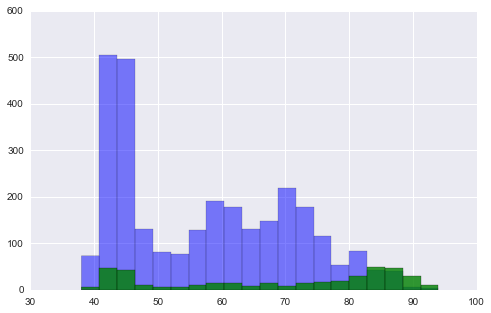

In [4]:

bins_num=20

result=application_pd.values[:,8]
age=application_pd.values[:,2]
age_rejected=age[result==1]
age_unrejected=age[result==0]

plt.hist(age_unrejected,bins=bins_num,facecolor='blue', alpha=0.5)
plt.hist(age_rejected,bins=bins_num,facecolor='green', alpha=0.8)



blue: un_rejected

(array([  3.,  24.,  32.,   7.,   5.,   2.,   9.,   9.,  11.,   7.,  12.,
          6.,  10.,  13.,  12.,   9.,  37.,  43.,  24.,   6.]),
 array([ 38. ,  40.8,  43.6,  46.4,  49.2,  52. ,  54.8,  57.6,  60.4,
         63.2,  66. ,  68.8,  71.6,  74.4,  77.2,  80. ,  82.8,  85.6,
         88.4,  91.2,  94. ]),
 <a list of 20 Patch objects>)

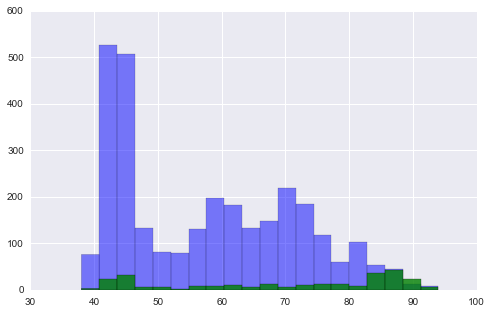

In [5]:
def map_status(status):
    if status in ['invited','reposted']:#'read',,'interviewed'#best:'invited'
        return 1
    else:
        return 0



application_pd=pd.DataFrame(application_list)
application_pd[9]=application_pd[9].map(lambda x:map_status(x))
application_pd[0] = application_pd[0].map( {u'男': 0, u'女': 1} )
# application_pd[2] = application_pd[2].map( lambda x:x/5)
application_pd[3] = application_pd[3].map( lambda x:x/5)
application_pd[1]=application_pd[1].map(lambda x:map_age(x))
application_pd=application_pd.drop(4,axis=1)
application_pd=application_pd.dropna()



result=application_pd.values[:,8]
age=application_pd.values[:,2]
age_invited=age[result==1]
age_uninvited=age[result==0]

plt.hist(age_uninvited,bins=bins_num,facecolor='blue', alpha=0.5)
plt.hist(age_invited,bins=bins_num,facecolor='green', alpha=0.8)

green: invited

(array([  29.,  192.,  196.,   46.,   25.,   30.,   29.,   72.,   72.,
          29.,   52.,   58.,   64.,   45.,   20.,   29.,   21.,   13.,
           3.,    3.]),
 array([ 38. ,  40.8,  43.6,  46.4,  49.2,  52. ,  54.8,  57.6,  60.4,
         63.2,  66. ,  68.8,  71.6,  74.4,  77.2,  80. ,  82.8,  85.6,
         88.4,  91.2,  94. ]),
 <a list of 20 Patch objects>)

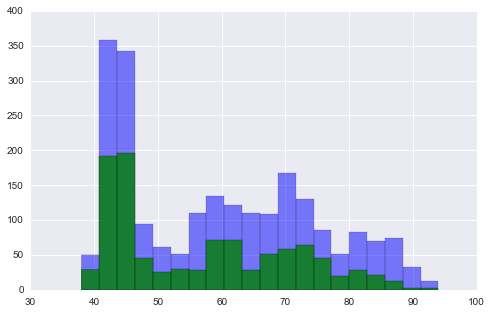

In [6]:
# bins_num=12
def map_status(status):
    if status in ["read"]:#'read',,'interviewed'#best:'invited'
        return 1
    else:
        return 0



application_pd=pd.DataFrame(application_list)
application_pd[9]=application_pd[9].map(lambda x:map_status(x))
application_pd[0] = application_pd[0].map( {u'男': 0, u'女': 1} )
# application_pd[2] = application_pd[2].map( lambda x:x/5)
application_pd[3] = application_pd[3].map( lambda x:x/5)
application_pd[1]=application_pd[1].map(lambda x:map_age(x))
application_pd=application_pd.drop(4,axis=1)
application_pd=application_pd.dropna()



result=application_pd.values[:,8]
age=application_pd.values[:,2]
age_read=age[result==1]
age_unread=age[result==0]

plt.hist(age_unread,bins=bins_num,facecolor='blue', alpha=0.5)
plt.hist(age_read,bins=bins_num,facecolor='green', alpha=0.8)


read : green

(array([  79.,  550.,  539.,  140.,   86.,   82.,  139.,  206.,  193.,
         139.,  161.,  226.,  194.,  131.,   71.,  112.,   91.,   87.,
          36.,   15.]),
 array([ 38. ,  40.8,  43.6,  46.4,  49.2,  52. ,  54.8,  57.6,  60.4,
         63.2,  66. ,  68.8,  71.6,  74.4,  77.2,  80. ,  82.8,  85.6,
         88.4,  91.2,  94. ]),
 <a list of 20 Patch objects>)

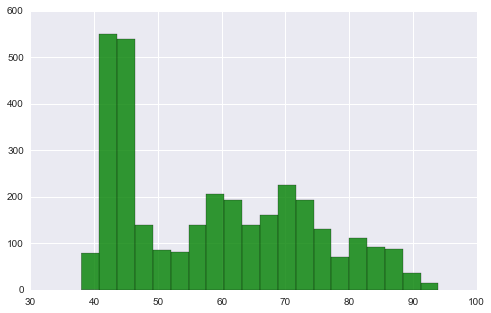

In [7]:
plt.hist(age,bins=bins_num,facecolor='green', alpha=0.8)